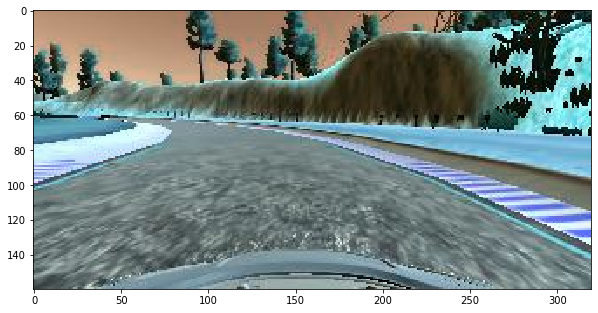

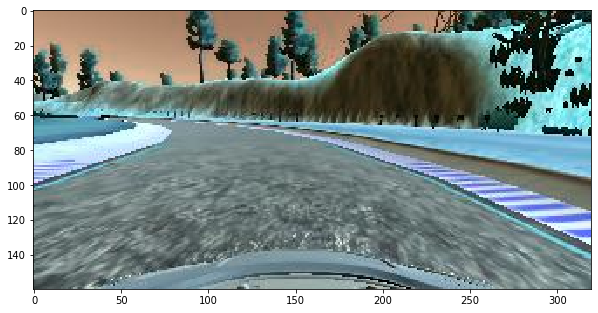

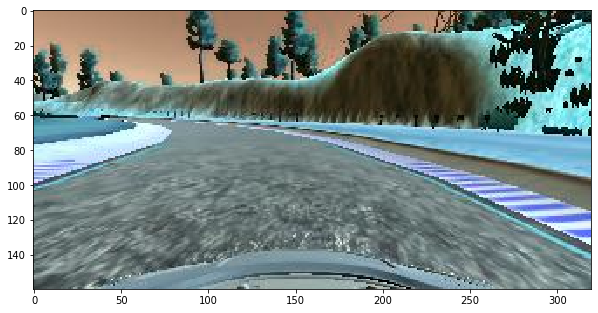

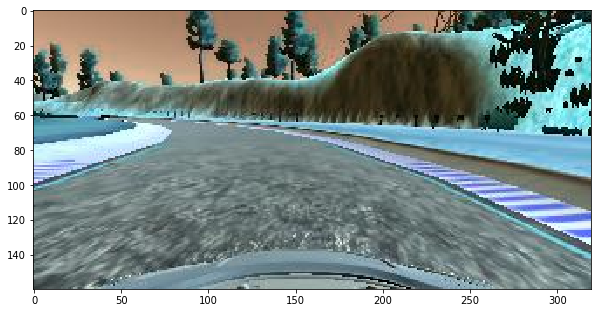

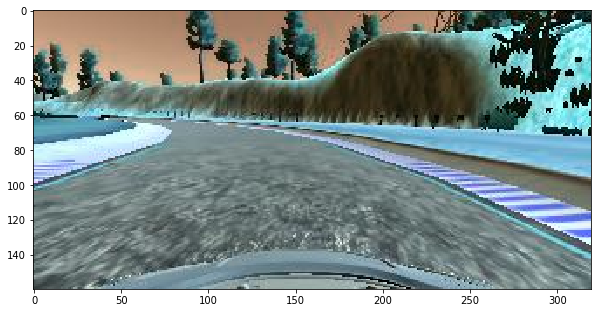

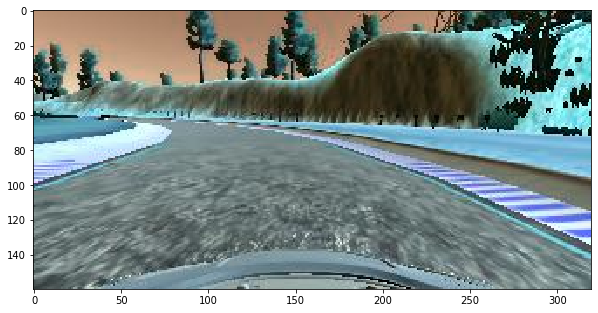

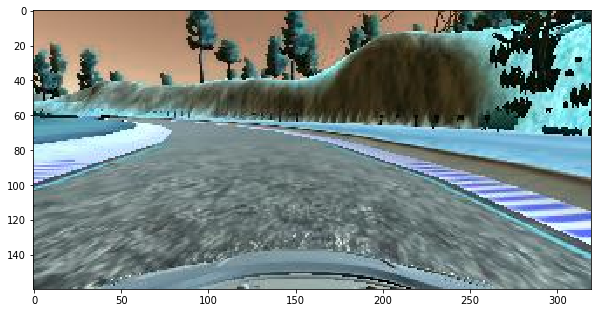

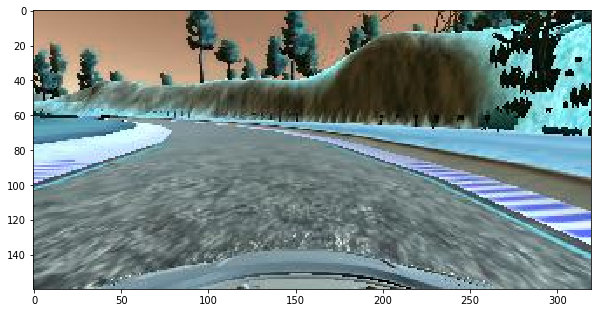

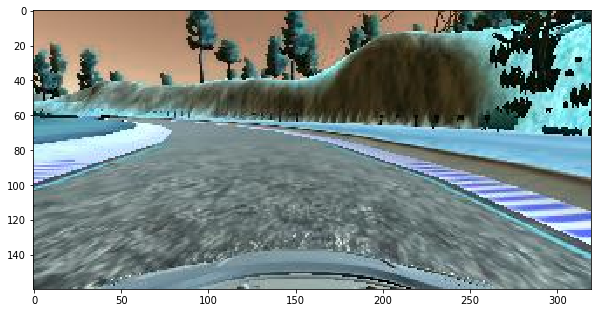

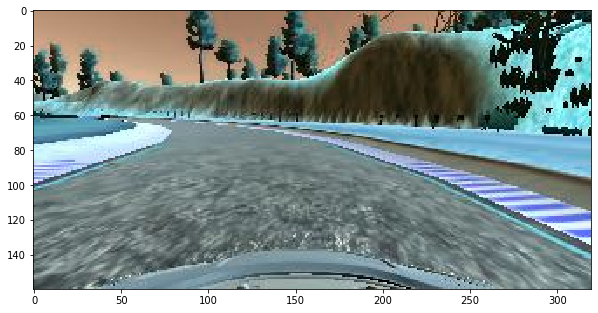

In [5]:
import cv2
import csv 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Lambda, Cropping2D

# Read training images info
lines = []
with open('./recorded_data/driving_log.csv') as csvfile:
    csv_reader = csv.reader(csvfile)
    for line in csv_reader:
        lines.append(line)

# Read images and Steering measurement
images = []
steering = []
for line in lines:
    source_path = line[0]
    file_name = source_path.split('\\')[-1] # Note the path delimiter for windows 
    current_path = './recorded_data/IMG/' + file_name
    image = cv2.imread(current_path)
    # resize and transform to grayscale for LeNet 
    # image = cv2.resize(image,32,32)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    images.append(image)
    measurement = line[3]
    steering.append(float(measurement)) 

X_train = np.array(images)
y_train = np.array(steering)

for i in range(10):
    plt.figure(figsize=(10,10))
    plt.imshow(X_train[i], cmap=plt.cm.binary)

In [ ]:
# LeNet arch with input (160,320,3)
model = Sequential([
    Conv2D(6,(5,5), activation='relu',input_shape=(160,320,3)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Conv2D(16,(5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(120),
    Dense(84),
    Dense(1)
])


# Compile the model 
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Model Training 
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, shuffle=True, verbose=2)

# Saving model
model.save('model_lenet.h5')

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Nvidia Architecture : https://arxiv.org/pdf/1604.07316v1.pdf
model = Sequential([
    Lambda(lambda x: x / 255.0 - 0.5,input_shape=(160,320,3)),
    Cropping2D(cropping=((70,25), (0,0))),
    Conv2D(24,(5,5),strides=(2,2),activation='relu'),
    Conv2D(36,(5,5),strides=(2,2),activation='relu'),
    Conv2D(48,(5,5),strides=(2,2),activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(100),
    Dense(50),
    Dense(10),
    Dense(1)
])

# Compile the model 
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Model Training 
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, shuffle=True, verbose=2)

# Saving model
model.save('model_nvidia.h5')

Train on 4064 samples, validate on 1016 samples
Epoch 1/10
4064/4064 - 27s - loss: 0.0415 - accuracy: 0.7106 - val_loss: 0.0267 - val_accuracy: 0.7717
Epoch 2/10
4064/4064 - 25s - loss: 0.0378 - accuracy: 0.7109 - val_loss: 0.0218 - val_accuracy: 0.7717
Epoch 3/10
4064/4064 - 25s - loss: 0.0310 - accuracy: 0.7111 - val_loss: 0.0210 - val_accuracy: 0.7717
Epoch 4/10
4064/4064 - 25s - loss: 0.0311 - accuracy: 0.7116 - val_loss: 0.0196 - val_accuracy: 0.7717
Epoch 5/10
4064/4064 - 25s - loss: 0.0240 - accuracy: 0.7119 - val_loss: 0.0237 - val_accuracy: 0.7717
Epoch 6/10
4064/4064 - 27s - loss: 0.0204 - accuracy: 0.7133 - val_loss: 0.0235 - val_accuracy: 0.7717
Epoch 7/10
4064/4064 - 27s - loss: 0.0189 - accuracy: 0.7131 - val_loss: 0.0274 - val_accuracy: 0.7717
Epoch 8/10
4064/4064 - 26s - loss: 0.0188 - accuracy: 0.7131 - val_loss: 0.0199 - val_accuracy: 0.7717
Epoch 9/10
4064/4064 - 27s - loss: 0.0167 - accuracy: 0.7133 - val_loss: 0.0234 - val_accuracy: 0.7717
Epoch 10/10
4064/4064 - 2

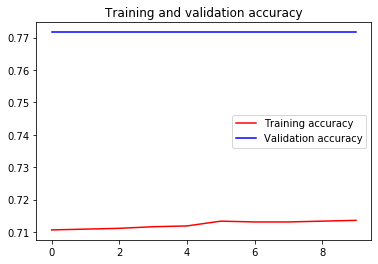

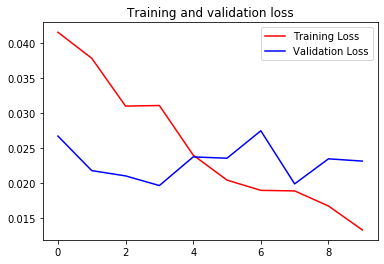

In [10]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()